In [3]:
# Import necessary libraries
import pandas as pd
import os
import re

# Load the CSV file
file_path = 'amazon_pet_memorial.csv'  # Update to local path in Jupyter directory
try:
    df_pet_memorial = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file {file_path} does not exist. Please upload the file and try again.")
    df_pet_memorial = pd.DataFrame()  # Create an empty DataFrame to avoid further errors if the file is missing

if not df_pet_memorial.empty:
    # Step 1: Handle missing values
    # - Drop rows where "ASIN" is missing (since it's a unique identifier for products)
    df_pet_memorial_cleaned = df_pet_memorial.dropna(subset=['ASIN']).copy()

    # - For "Price", "Rating", and "Rating Count" columns, fill missing values with suitable replacements
    #   Price: Fill with median price, as it represents a central value suitable for numerical data
    #   Rating & Rating Count: Fill with 0, representing no ratings available
    df_pet_memorial_cleaned['Price'] = df_pet_memorial_cleaned['Price'].fillna(df_pet_memorial_cleaned['Price'].median())
    df_pet_memorial_cleaned['Rating'] = df_pet_memorial_cleaned['Rating'].fillna(0)
    df_pet_memorial_cleaned['Rating Count'] = df_pet_memorial_cleaned['Rating Count'].fillna(0)

    # Step 2: Clean "Monthly Sales" column
    # Convert shorthand like '1k+' to proper numeric values
    def convert_sales(value):
        value = str(value).lower()
        if pd.isna(value) or value == '' or value == 'nan':
            return 0  # If the sales value is missing or not available, set it to 0
        if 'k' in value:
            return float(re.sub('[^0-9]', '', value)) * 1000
        elif '+' in value:
            return float(re.sub('[^0-9]', '', value))
        else:
            return float(value)

    df_pet_memorial_cleaned['Monthly Sales'] = df_pet_memorial_cleaned['Monthly Sales'].apply(convert_sales)

    # Step 3: Data type conversion
    # Convert "Price" and "Rating Count" columns to appropriate numeric types if they aren't already
    df_pet_memorial_cleaned['Price'] = df_pet_memorial_cleaned['Price'].astype(float)
    df_pet_memorial_cleaned['Rating Count'] = df_pet_memorial_cleaned['Rating Count'].astype(int)

    # Step 4: Handle potential duplicates
    # - Drop duplicate rows based on "ASIN" since it's supposed to be unique for each product
    df_pet_memorial_cleaned.drop_duplicates(subset='ASIN', inplace=True)

    # Step 5: Save the cleaned data to a new CSV file
    cleaned_file_path = 'amazon_pet_memorial_cleaned.csv'  # Update to local path
    df_pet_memorial_cleaned.to_csv(cleaned_file_path, index=False)

    # Preview the cleaned data (for display purposes in a notebook environment)
    from IPython.display import display
    display(df_pet_memorial_cleaned)
else:
    print("The DataFrame is empty. No further processing will be done.")


,Title,Price,Rating,Rating Count,ASIN,Monthly Sales,Image URL,Product URL
0,Pet Memorial Stones with Photo Frame for Dogs ...,23.99,4.5,199,B07PDBY43T,0.0,https://m.media-amazon.com/images/I/71YmjglG8A...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,"Pet Memorial Suncatcher, Dog Memorial Gifts, P...",22.99,4.7,119,B0CNKK2WL2,1000.0,https://m.media-amazon.com/images/I/71mi2+A-Xq...,https://www.amazon.com/Memorial-Suncatcher-Tho...
2,iHeartDogs Dog Memorial Gifts - Forever My Gua...,24.99,4.7,1903,B09853W93F,1000.0,https://m.media-amazon.com/images/I/61qPQn9Zpv...,https://www.amazon.com/iHeartDogs-Dog-Memorial...
3,"ODB Personalized Pet Memorial Stones, Black Gr...",14.99,4.8,1645,B09645T5TL,600.0,https://m.media-amazon.com/images/I/61wh9vZl5h...,https://www.amazon.com/ODB-Personalized-Memori...
4,"Pet Memorial Gifts,Rainbow Bridge Bracelet for...",11.19,4.9,2478,B086V7LQTJ,1000.0,https://m.media-amazon.com/images/I/716HTUmN0i...,https://www.amazon.com/Unijew-Memorial-Rainbow...
...,...,...,...,...,...,...,...,...
384,Giraffe Elephant Sea Moon Heart Shape Pet Urn ...,16.99,0.0,0,B0DM8YBWF3,0.0,https://m.media-amazon.com/images/I/51kEUlRaim...,https://www.amazon.com/dp/B0DM8YBWF3/ref=sr_1_...
386,Hibiscus Flowers Heart Shape Pet Urn Necklace ...,16.99,0.0,0,B0DM8YBWDN,0.0,https://m.media-amazon.com/images/I/51vNsxxWcX...,https://www.amazon.com/dp/B0DM8YBWDN/ref=sr_1_...
387,Elephants with Flowers in Spring Heart Shape P...,16.99,0.0,0,B0DM8YBHFZ,0.0,https://m.media-amazon.com/images/I/51VnUrt-lU...,https://www.amazon.com/dp/B0DM8YBHFZ/ref=sr_1_...
388,Cute Turtles Starfish Heart Shape Pet Urn Neck...,16.99,0.0,0,B0DM8YBHFW,0.0,https://m.media-amazon.com/images/I/5119FMQXfR...,https://www.amazon.com/dp/B0DM8YBHFW/ref=sr_1_...


Descriptive Statistics for Price, Rating, and Rating Count (Ignoring Ratings of 0):
            Price      Rating  Rating Count
count  182.000000  182.000000    182.000000
mean    21.360165    4.651099    694.082418
std     13.732423    0.409924   3022.614084
min      4.390000    2.000000      1.000000
25%     14.990000    4.600000      9.250000
50%     19.990000    4.800000     56.000000
75%     24.990000    4.900000    302.750000
max    164.990000    5.000000  35479.000000
Top 10 Products by Monthly Sales (Ignoring Ratings of 0):
                                                Title  Monthly Sales
2   iHeartDogs Dog Memorial Gifts - Forever My Gua...         1000.0
4   Pet Memorial Gifts,Rainbow Bridge Bracelet for...         1000.0
5   Willow Tree Angel of Friendship, for Those who...         1000.0
1   Pet Memorial Suncatcher, Dog Memorial Gifts, P...         1000.0
13  Pet Memorial Gifts for Dogs Cats - Rotating Wo...          900.0
6   SteadStyle Dog Memorial Gifts for Loss of Do

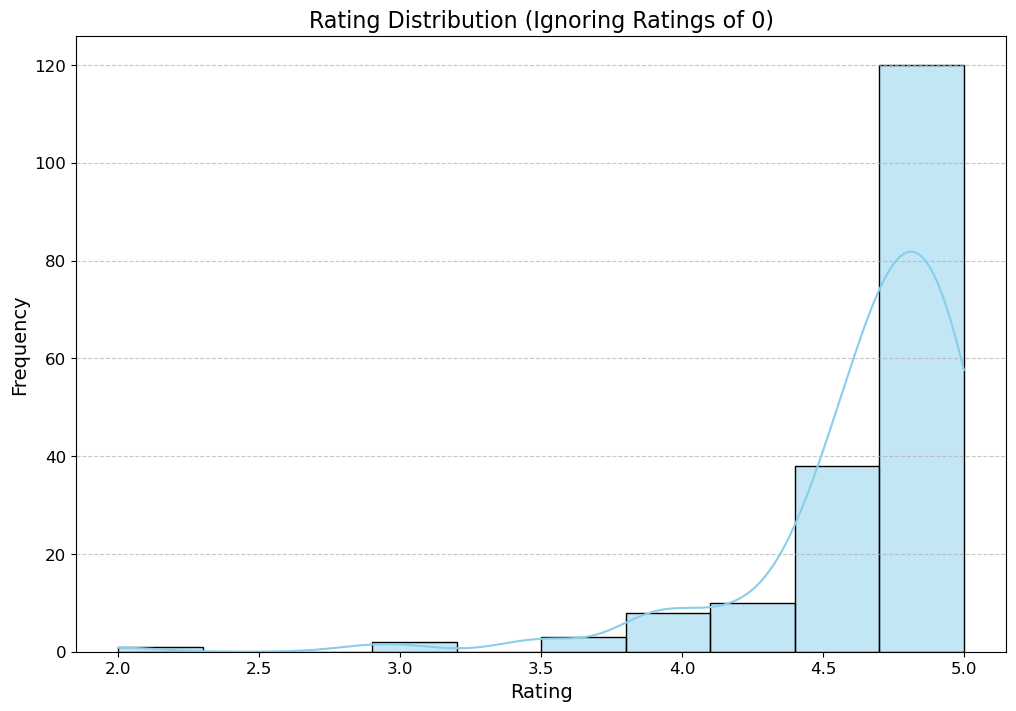

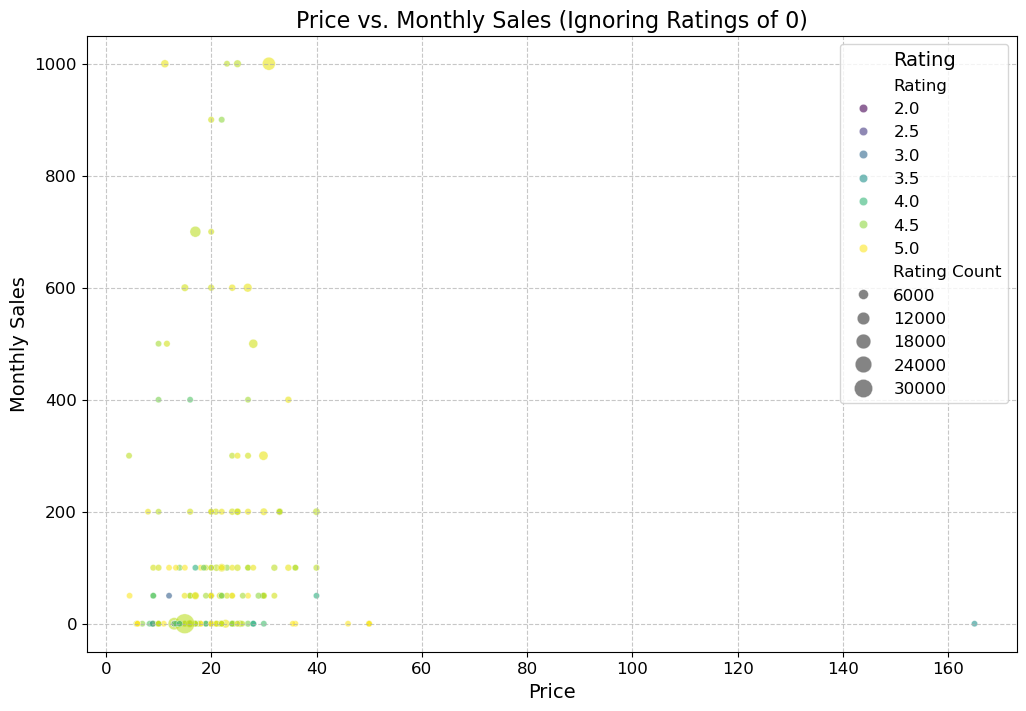

Top 10 Popular Products by Rating Count and Monthly Sales (Ignoring Ratings of 0):
                                                 Title  Rating Count  \
330  JoycuFF Women Bangle Bracelet Cuffs Open White...         35479   
5    Willow Tree Angel of Friendship, for Those who...         13257   
84   SAM & LORI Personal Bracelets for Teens/Women-...         11308   
42   Pearhead Pet Paw Print Photo Frame With Clay I...          8121   
7    Willow Tree Angel of Comfort, Offering an Embr...          4612   
14   Pet Memorial Wind Chime - 18" Metal Casted Paw...          4264   
32   Willow Tree True, Truly a friend, Box for Jewe...          3634   
90   Evergreen Pet Paw Print If Love Could Have Sav...          3355   
57   Pawprints Pet Memorial Frame with Pawprints Le...          2906   
4    Pet Memorial Gifts,Rainbow Bridge Bracelet for...          2478   

     Monthly Sales  
330            0.0  
5           1000.0  
84             0.0  
42           700.0  
7            300.0 

,Title,Price,Rating,Rating Count,ASIN,Monthly Sales,Image URL,Product URL
0,Pet Memorial Stones with Photo Frame for Dogs ...,23.99,4.5,199,B07PDBY43T,0.0,https://m.media-amazon.com/images/I/71YmjglG8A...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,"Pet Memorial Suncatcher, Dog Memorial Gifts, P...",22.99,4.7,119,B0CNKK2WL2,1000.0,https://m.media-amazon.com/images/I/71mi2+A-Xq...,https://www.amazon.com/Memorial-Suncatcher-Tho...
2,iHeartDogs Dog Memorial Gifts - Forever My Gua...,24.99,4.7,1903,B09853W93F,1000.0,https://m.media-amazon.com/images/I/61qPQn9Zpv...,https://www.amazon.com/iHeartDogs-Dog-Memorial...
3,"ODB Personalized Pet Memorial Stones, Black Gr...",14.99,4.8,1645,B09645T5TL,600.0,https://m.media-amazon.com/images/I/61wh9vZl5h...,https://www.amazon.com/ODB-Personalized-Memori...
4,"Pet Memorial Gifts,Rainbow Bridge Bracelet for...",11.19,4.9,2478,B086V7LQTJ,1000.0,https://m.media-amazon.com/images/I/716HTUmN0i...,https://www.amazon.com/Unijew-Memorial-Rainbow...
...,...,...,...,...,...,...,...,...
340,Dog Memorial Gifts For Loss Of Dog - Lost Pet ...,12.99,3.5,2,B0D6G323VP,0.0,https://m.media-amazon.com/images/I/81nZLPlZhI...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
341,"Memorial Picture Frame, Pet Picture Frame, Sym...",13.29,4.3,11,B0C7QFD4KG,0.0,https://m.media-amazon.com/images/I/71q9Q5KJ6X...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
342,"Pet Memorial Picture Frame for Loss, Pet Loss ...",13.99,3.9,4,B0CKHYTNJ1,0.0,https://m.media-amazon.com/images/I/71v1UsOz2T...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
343,Heart Shaped Pet Dog Memorial Stones Grave Sto...,23.99,4.5,187,B07F9M5C6D,0.0,https://m.media-amazon.com/images/I/71KWr+4Waf...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data file
cleaned_file_path = 'amazon_pet_memorial_cleaned.csv'
try:
    df_pet_memorial_cleaned = pd.read_csv(cleaned_file_path)
except FileNotFoundError:
    print(f"The file {cleaned_file_path} does not exist. Please run the data cleaning process and try again.")
    df_pet_memorial_cleaned = pd.DataFrame()  # Create an empty DataFrame to avoid further errors if the file is missing

if not df_pet_memorial_cleaned.empty:
    # Filter out rows where Rating is 0
    df_pet_memorial_filtered = df_pet_memorial_cleaned[df_pet_memorial_cleaned['Rating'] > 0]

    # Step 1: Data Analysis
    # Descriptive Statistics
    print("Descriptive Statistics for Price, Rating, and Rating Count (Ignoring Ratings of 0):")
    print(df_pet_memorial_filtered[['Price', 'Rating', 'Rating Count']].describe())

    # Sales Performance Analysis
    # Top products by monthly sales
    top_sales = df_pet_memorial_filtered.sort_values(by='Monthly Sales', ascending=False).head(10)
    print("Top 10 Products by Monthly Sales (Ignoring Ratings of 0):")
    print(top_sales[['Title', 'Monthly Sales']])

    # Rating Distribution (Ignoring Ratings of 0)
    plt.figure(figsize=(12, 8))
    sns.histplot(df_pet_memorial_filtered['Rating'], bins=10, kde=True, color='skyblue')
    plt.title('Rating Distribution (Ignoring Ratings of 0)', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('rating_distribution.png')
    plt.show()

    # Price vs. Monthly Sales Scatter Plot (Ignoring Ratings of 0)
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_pet_memorial_filtered, x='Price', y='Monthly Sales', hue='Rating', palette='viridis', size='Rating Count', sizes=(20, 200), alpha=0.6)
    plt.title('Price vs. Monthly Sales (Ignoring Ratings of 0)', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Monthly Sales', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Rating', fontsize=12, title_fontsize=14, loc='upper right')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.savefig('price_vs_sales_scatter.png')
    plt.show()

    # Popular Products by Rating Count and Monthly Sales (Ignoring Ratings of 0)
    popular_products = df_pet_memorial_filtered.sort_values(by=['Rating Count', 'Monthly Sales'], ascending=False).head(10)
    print("Top 10 Popular Products by Rating Count and Monthly Sales (Ignoring Ratings of 0):")
    print(popular_products[['Title', 'Rating Count', 'Monthly Sales']])

    # Preview the filtered data (for display purposes in a notebook environment)
    from IPython.display import display
    display(df_pet_memorial_filtered)
else:
    print("The DataFrame is empty. No further processing will be done.")


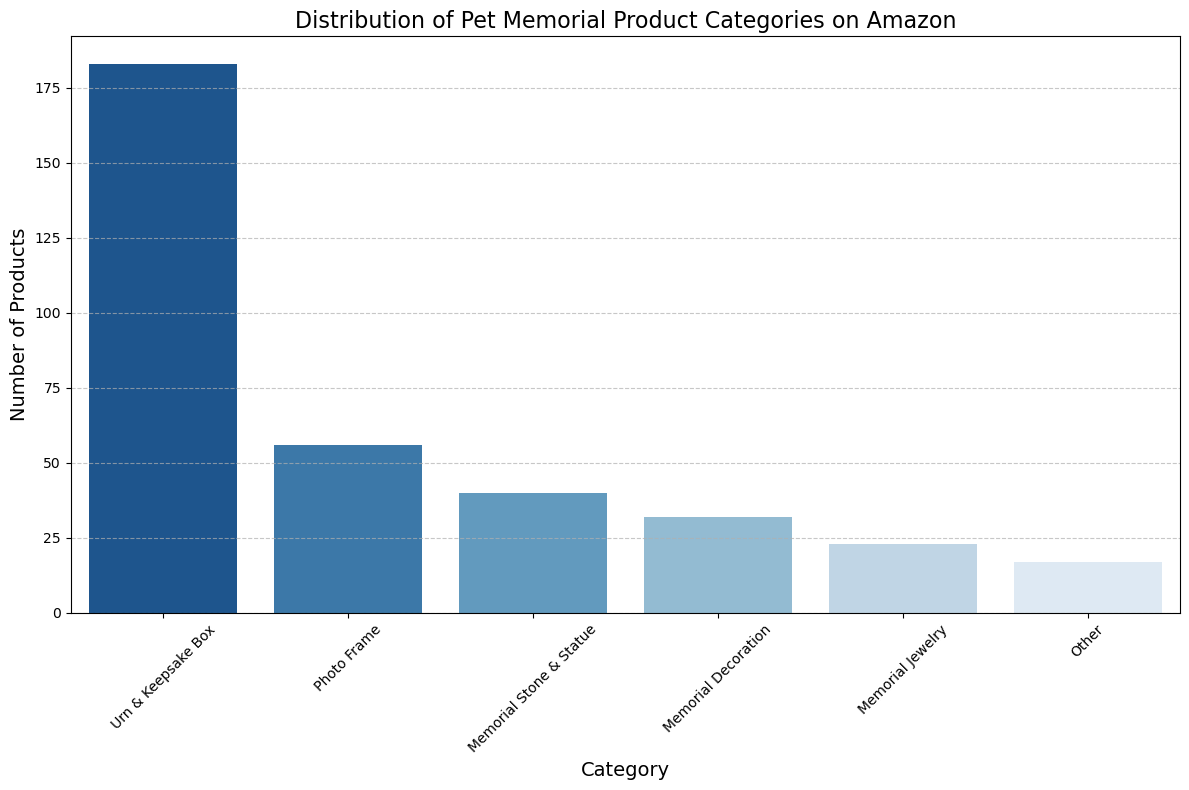

Top Pet Memorial Product Categories by Number of Listings:
                  Category  Count
0       Urn & Keepsake Box    183
1              Photo Frame     56
2  Memorial Stone & Statue     40
3      Memorial Decoration     32
4         Memorial Jewelry     23
5                    Other     17


In [49]:
# Categorize products based on keywords in the title
def categorize_product(title):
    title = title.lower()
    if any(keyword in title for keyword in ['urn', 'ashes', 'cremation', 'keepsake', 'box']):
        return 'Urn & Keepsake Box'
    elif any(keyword in title for keyword in ['frame', 'photo', 'picture']):
        return 'Photo Frame'
    elif any(keyword in title for keyword in ['stone', 'marker', 'headstone', 'grave', 'statue', 'figurine', 'sculpture']):
        return 'Memorial Stone & Statue'
    elif any(keyword in title for keyword in ['jewelry', 'necklace', 'bracelet', 'pendant', 'keychain', 'ring', 'plaque', 'engraved', 'engraving']):
        return 'Memorial Jewelry'
    elif any(keyword in title for keyword in ['paw', 'pawprint', 'paw print', 'pawprints', 'paw print memorial', 'wind chime', 'windchime', 'chime', 'suncatcher', 'stained glass', 'candle holder', 'lantern']):
        return 'Memorial Decoration'
    else:
        # If no other categories match, classify as 'Other'
        return 'Other'

# Apply categorization function to the DataFrame
df_pet_memorial_cleaned['Category'] = df_pet_memorial_cleaned['Title'].apply(categorize_product)

# Analyze Product Categories
category_counts = df_pet_memorial_cleaned['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot the Distribution of Product Categories
plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts, x='Category', y='Count', hue='Category', palette='Blues_r', dodge=False, legend=False)
plt.title('Distribution of Pet Memorial Product Categories on Amazon', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pet_memorial_category_distribution.png')
plt.show()

# Display the top categories in a table format
print("Top Pet Memorial Product Categories by Number of Listings:")
print(category_counts.head(10))


In [ ]:
#价格直方图
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，尝试使用不同的编码格式
data = pd.read_csv('D:/桌面文件夹/amazon_pet_memorial_cleaned.csv', encoding='ISO-8859-1')

# 提取商品价格列，并确保其为数值类型
prices = pd.to_numeric(data['Price'], errors='coerce')
prices = prices.dropna()  # 去除空值

# 计算平均价格
mean_price = prices.mean()

# 设置价格区间
bins = [0, 10, 20, 30, 40, 50]

# 绘制直方图
plt.figure(figsize=(12, 8)) 
plt.hist(prices, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')

# 添加标题和标签
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.xticks(bins)  # 使用价格区间作为x轴刻度
plt.legend()

# 添加网格线以提高可读性
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图像
plt.tight_layout()
plt.show()
plt.savefig('D:/桌面文件夹/price_distribution_histogram.png', dpi=400, bbox_inches='tight')